In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
# load data set

In [6]:
df = pd.read_csv(r"C:\Users\Admin\Downloads\Daily Household Transactions (2).csv")
  
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [7]:
#data cleaning

In [8]:
df.isnull().sum()

Date                0
Mode                0
Category            0
Subcategory       635
Note              521
Amount              0
Income/Expense      0
Currency            0
dtype: int64

In [9]:
df.columns


Index(['Date', 'Mode', 'Category', 'Subcategory', 'Note', 'Amount',
       'Income/Expense', 'Currency'],
      dtype='object')

In [10]:
df.dropna(subset=['Date', 'Amount'], inplace=True)


In [11]:
df['Transaction_ID'] = range(1, len(df) + 1)


In [12]:
df.dropna(subset=['Date', 'Transaction_ID', 'Amount'], inplace=True)


In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


C:\Users\Admin\AppData\Local\Temp\ipykernel_1188\579959469.py:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [14]:
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')


In [15]:
text_cols = ['Mode', 'Category', 'Subcategory', 'Note', 'Income/Expense', 'Currency']
df[text_cols] = df[text_cols].astype('string')


In [16]:
df['Income/Expense'] = df['Income/Expense'].str.strip().str.title()


In [17]:
df.drop_duplicates(inplace=True)


In [18]:
df.drop_duplicates(subset=['Date', 'Amount', 'Note'], inplace=True)


In [19]:
# Verifydatatype

In [20]:
df.drop_duplicates(
    subset=['Date', 'Amount', 'Category', 'Mode'],
    inplace=True
)


In [21]:
df.reset_index(drop=True, inplace=True)


In [22]:
df.dtypes


Date              datetime64[ns]
Mode              string[python]
Category          string[python]
Subcategory       string[python]
Note              string[python]
Amount                   float64
Income/Expense    string[python]
Currency          string[python]
Transaction_ID             int64
dtype: object

# Eploratory data analysis (EDA)
# Summary statistics
# Distribution of tranzaction amounts
# Trasction counts by category and type

In [23]:
# Summary statistics
df.describe()

,Date,Amount,Transaction_ID
count,1301,1780.000000,1780.000000
mean,2017-05-13 01:16:37.963874048,2993.327292,1149.081461
min,2015-01-13 18:52:47,2.000000,1.000000
25%,2016-12-18 20:18:54,34.000000,533.500000
50%,2017-07-27 20:33:23,100.000000,1101.500000
75%,2018-01-30 15:31:24,385.250000,1736.250000
max,2018-09-20 12:04:08,250000.000000,2456.000000
std,NaN,14232.511733,710.972110


In [24]:
#Distribution of tranzaction amounts

In [25]:
plt.figure(figsize=(10,6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

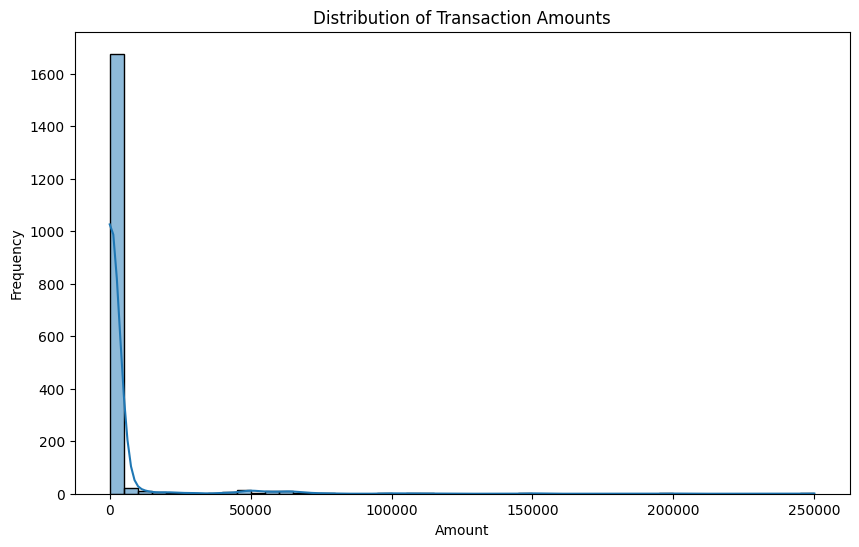

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()


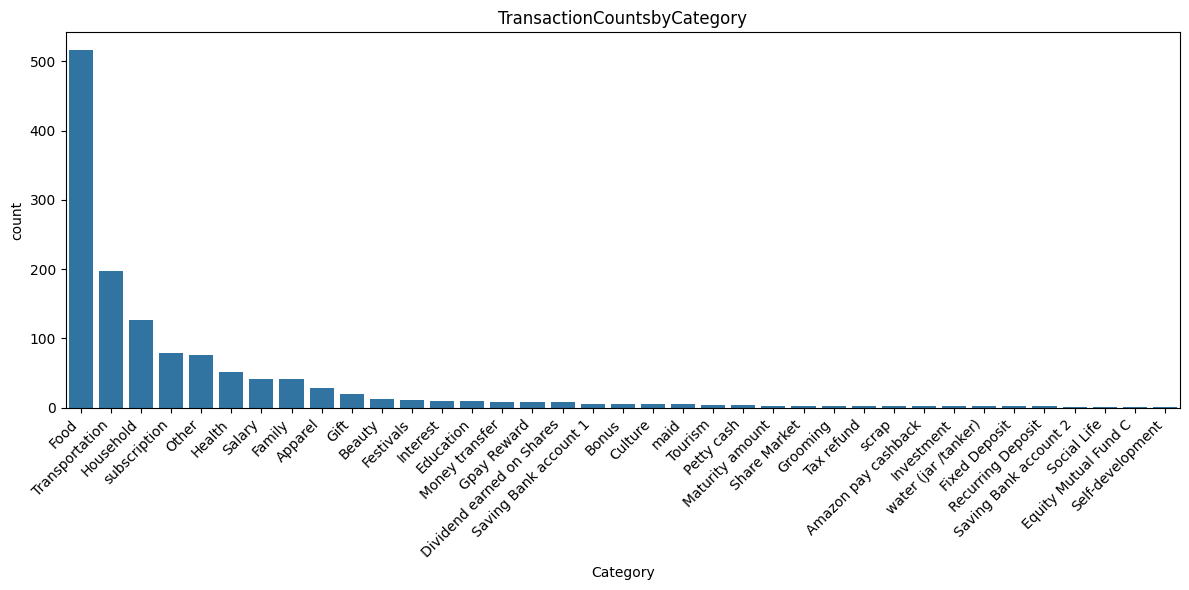

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

sns.countplot(
    data=df,
    x='Category',
    order=df['Category'].value_counts().index
)
plt.title('TransactionCountsbyCategory')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



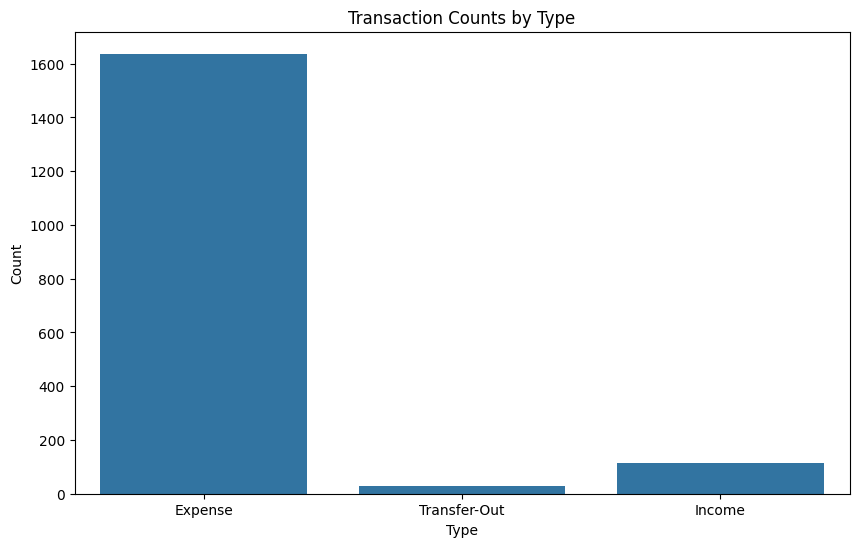

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Income/Expense')
plt.title('Transaction Counts by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


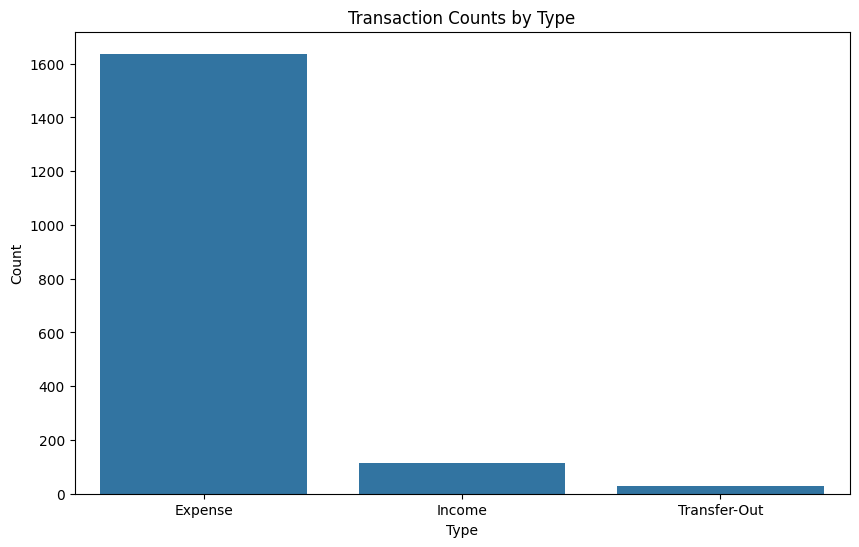

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x='Income/Expense',
    order=df['Income/Expense'].value_counts().index
)
plt.title('Transaction Counts by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


## Time series analysis
# time series analysis
# monthly daily trends
#

C:\Users\Admin\AppData\Local\Temp\ipykernel_1188\1563872952.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M', on='Date')['Amount']


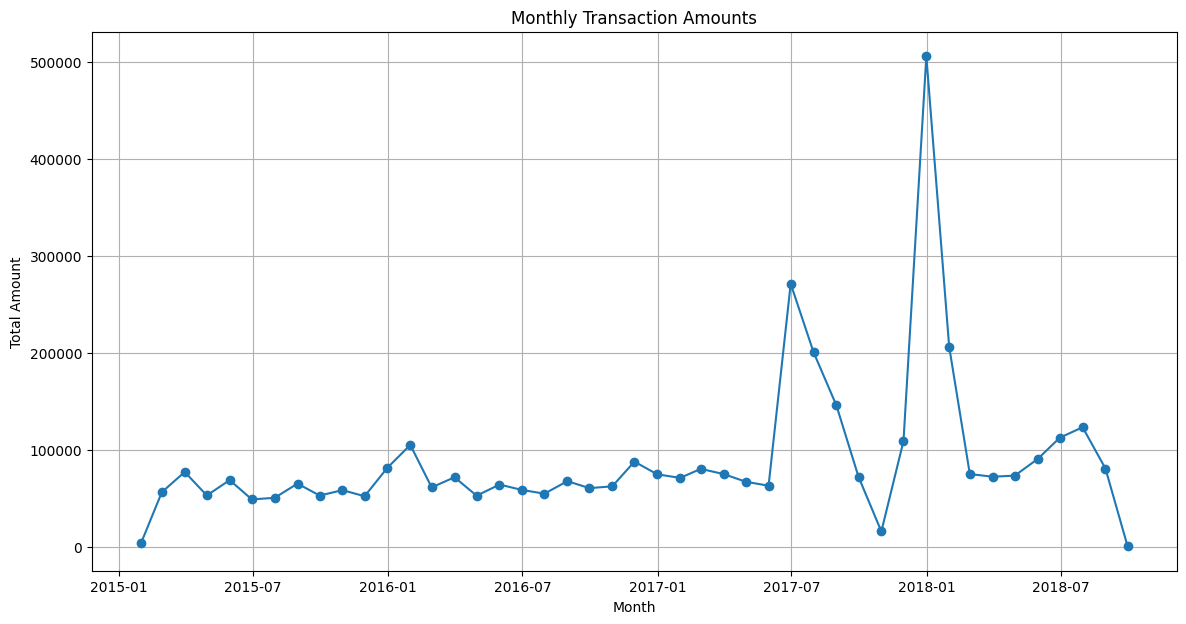

In [37]:
import matplotlib.pyplot as plt

monthly_data = (
    df.resample('M', on='Date')['Amount']
      .sum()
)

plt.figure(figsize=(14, 7))
plt.plot(monthly_data.index, monthly_data, marker='o')
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


In [42]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [43]:
df = df.dropna(subset=['Date', 'Amount'])


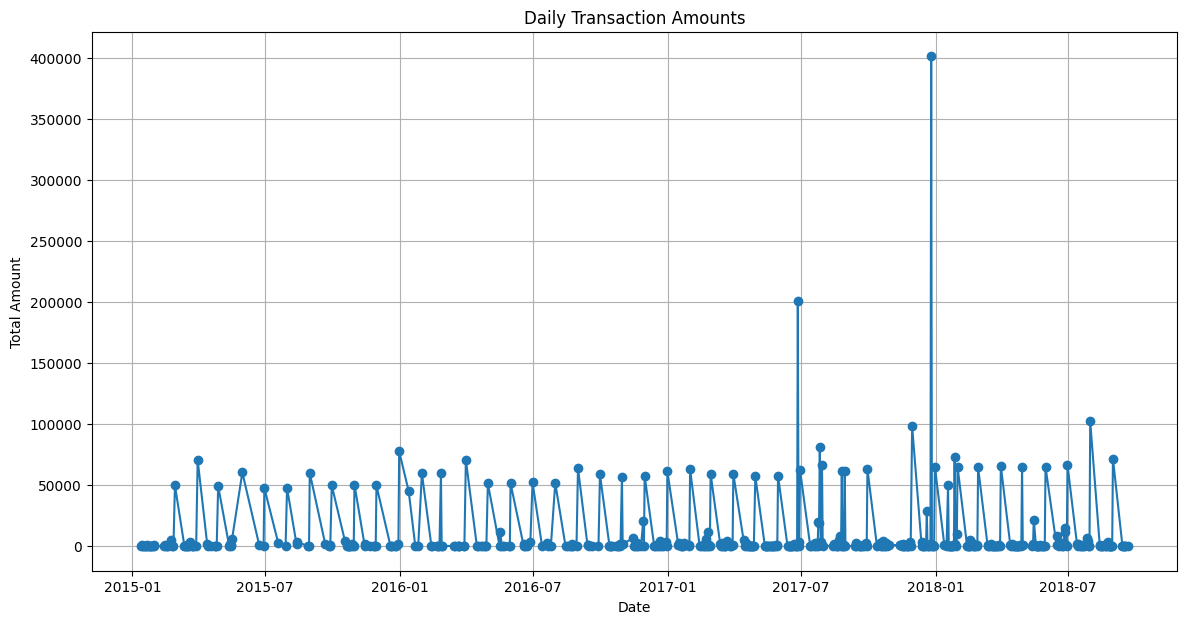

In [46]:
# Daily trends
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

daily_data = df.groupby(df['Date'].dt.date)['Amount'].sum()

plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data.values, marker='o')
plt.title('Daily Transaction Amounts')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


In [47]:
# Create a pivot table for correlation analysis
pivot_table = df.pivot_table(
    index='Date',
    columns='Category',
    values='Amount',
    aggfunc='sum',
    fill_value=0
)

# Calculate correlation matrix
correlation_matrix = pivot_table.corr()


In [48]:
correlation_matrix.head()


Category,Amazon pay cashback,Apparel,Beauty,Bonus,Culture,Dividend earned on Shares,Education,Equity Mutual Fund C,Family,Festivals,...,Self-development,Share Market,Social Life,Tax refund,Tourism,Transportation,maid,scrap,subscription,water (jar /tanker)
Category,,,,,,,,,,,,,,,,,,,,,
Amazon pay cashback,1.000000,-0.002161,-0.001383,-0.000933,-0.001891,-0.002069,-0.002570,-0.000917,-0.003707,-0.002025,...,-0.000917,-0.001359,-0.000917,-0.001169,-0.000945,-0.001962,-0.001894,-0.001004,-0.001887,-0.001297
Apparel,-0.002161,1.000000,-0.002988,-0.002016,-0.004085,-0.004472,0.012273,-0.001982,-0.008010,-0.004375,...,-0.001982,-0.002936,-0.001982,-0.002526,-0.002042,-0.001387,-0.004093,-0.002169,-0.004078,-0.002804
Beauty,-0.001383,-0.002988,1.000000,-0.001290,-0.002615,-0.002862,-0.003554,-0.001268,-0.005126,-0.002800,...,-0.001268,-0.001879,-0.001268,-0.001617,-0.001307,-0.002713,-0.002620,-0.001388,-0.002610,-0.001794
Bonus,-0.000933,-0.002016,-0.001290,1.000000,-0.001764,-0.001931,-0.002397,-0.000856,-0.003458,-0.001889,...,-0.000856,-0.001268,-0.000856,-0.001091,-0.000882,-0.001831,-0.001767,-0.000937,-0.001761,-0.001211
Culture,-0.001891,-0.004085,-0.002615,-0.001764,1.000000,-0.003913,-0.004858,-0.001734,0.003376,-0.003828,...,-0.001734,-0.002569,-0.001734,-0.002210,-0.001786,-0.003709,-0.003581,-0.001898,-0.003568,-0.002453


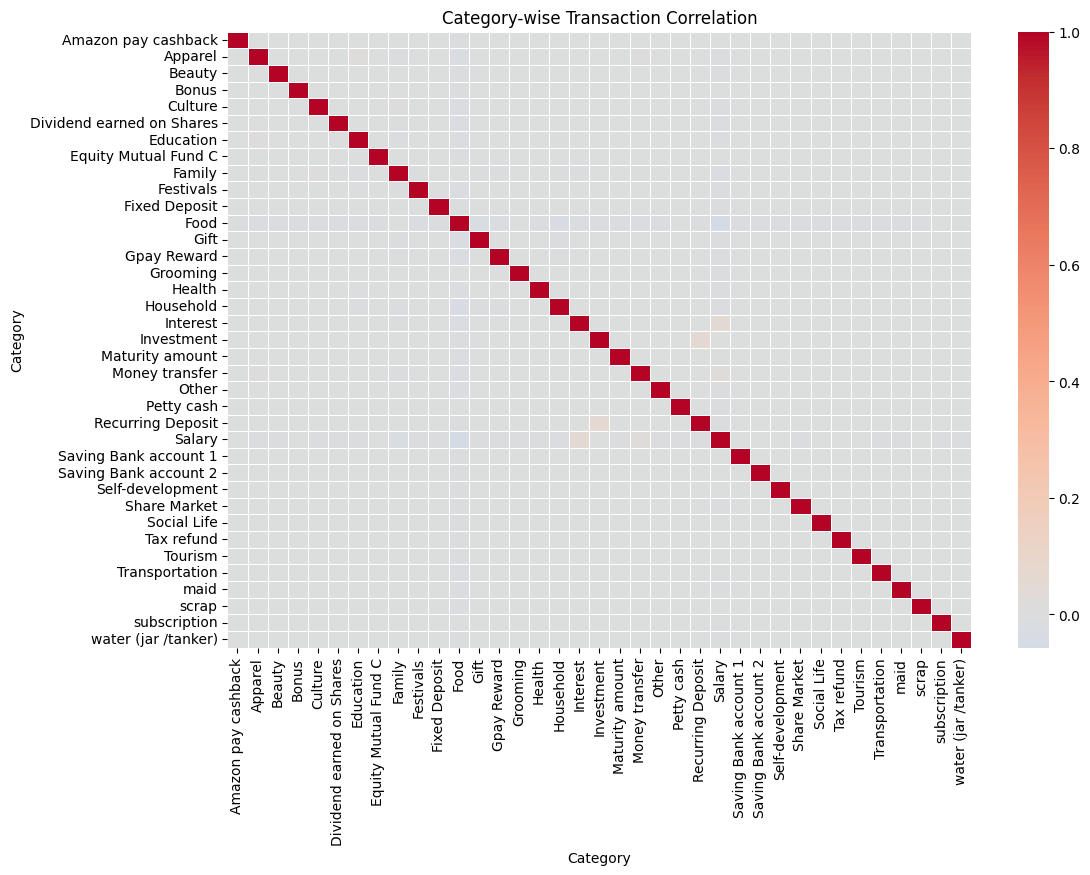

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Category-wise Transaction Correlation')
plt.show()


In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

pivot_table = df.pivot_table(
    index='Month',
    columns='Category',
    values='Amount',
    aggfunc='sum',
    fill_value=0
)

correlation_matrix = pivot_table.corr()


In [ ]:
df['Month'] = df['Date'].dt.to_period('M')

pivot_table = df.pivot_table(
    index='Month',
    columns='Category',
    values='Amount',
    aggfunc='sum',
    fill_value=0
)

correlation_matrix = pivot_table.corr()


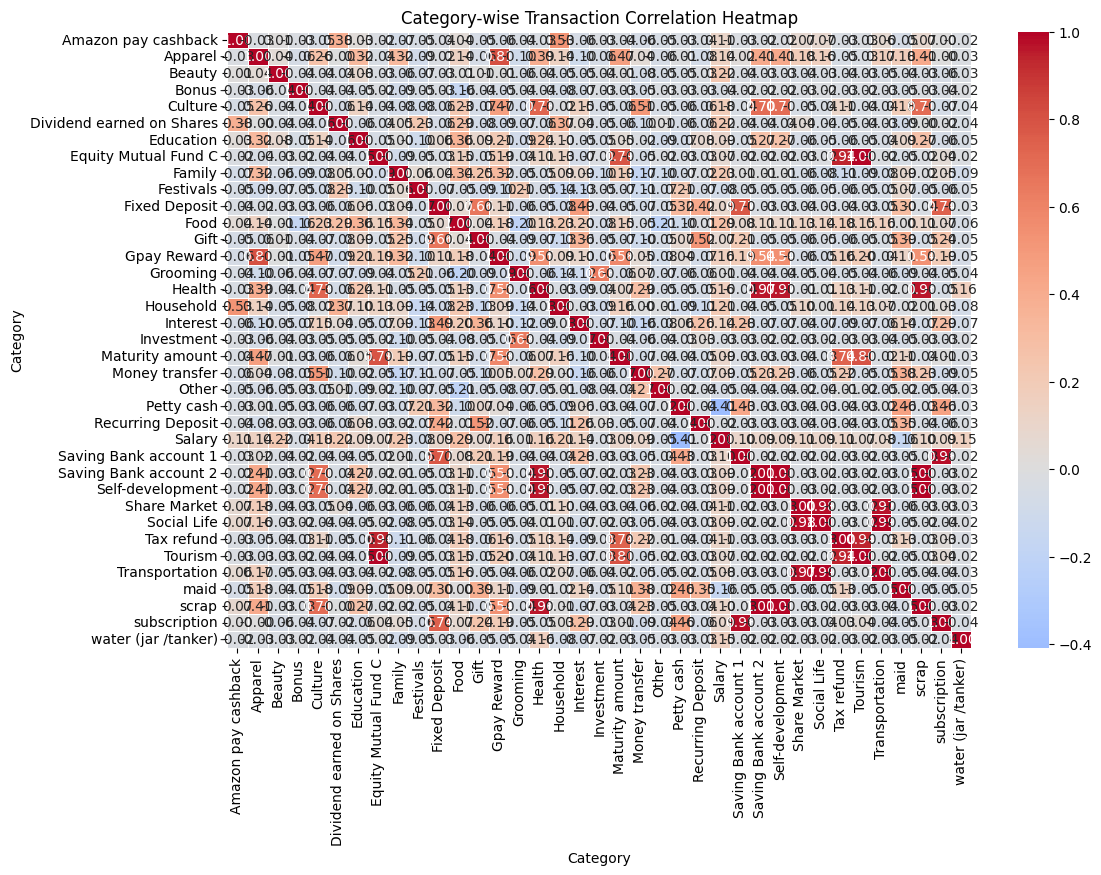

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,          # show correlation values
    fmt=".2f",           # 2 decimal places
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Category-wise Transaction Correlation Heatmap')
plt.show()


In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date', 'Amount', 'Category'])


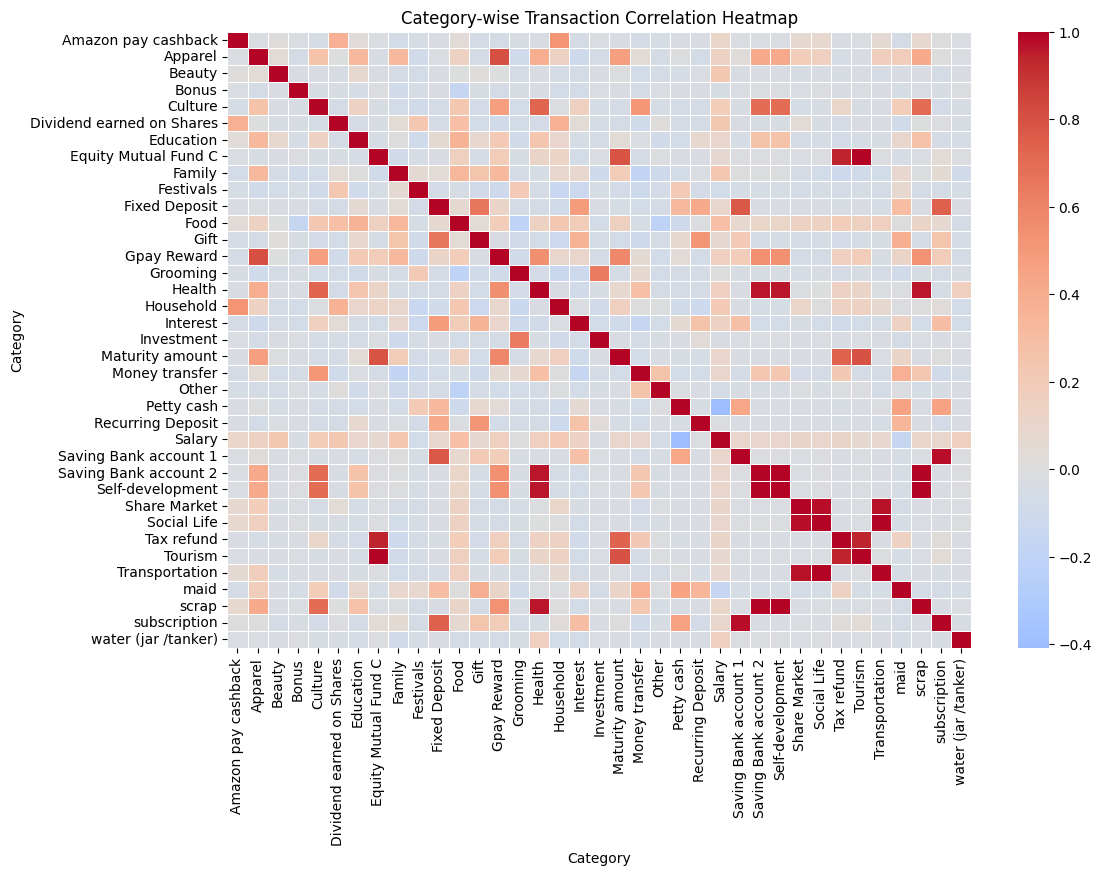

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5
)
plt.title('Category-wise Transaction Correlation Heatmap')
plt.show()


Household expenses are routine-heavy and necessity-driven.

Spending behavior is highly skewed, with few transactions contributing a large portion of total expenditure.

Expense tracking at a daily level helps identify high-impact days.

Category-wise analysis highlights essential vs discretionary spending.

Monthly and daily trend analysis is useful for budget planning and cash flow management.

1. Executive Summary
The dataset represents a personal or small business financial record characterized by a high volume of small, frequent expenses and occasional, high-value income or maturity events. The financial activity remained relatively stable until mid-2017, after which it saw significant volatility and several large-scale transactions.

2. Transaction Volume and Types
Dominance of Expenses: The vast majority of transactions are classified as Expenses (over 1,600 counts), significantly outnumbering Income and Transfers-Out.

Top Spending Categories: * Food is the most frequent category (over 500 transactions).

Transportation, Household, and Subscriptions follow as the next most common categories.

Niche categories like "Self-development" or "Equity Mutual Funds" have the lowest frequency.

3. Spending Patterns and Distribution
Transaction Magnitude: Most transactions are very small (clustered near 0 on the distribution plot). However, the distribution has a "long tail," with rare transactions reaching up to 250,000.

Correlation Insights:

There is a notable positive correlation between Salary and categories like Investment and Interest, suggesting a structured habit of moving income into savings.

Health and Household also show a degree of correlation, potentially indicating periods of high "lifecycle" maintenance costs.

4. Temporal Trends (2015–2018)
Stability (2015 – Mid-2017): Monthly and daily spending remained relatively flat and predictable during this period.

The "Late 2017 Spike": There is a massive surge in transaction amounts starting in late 2017.

A significant peak in daily transactions occurred just before January 2018, exceeding 400,000 in a single day.

This drove the monthly total for that period to over 500,000, likely representing a major investment, property purchase, or maturity of a fixed deposit.

2018 Decline: Following the late 2017/early 2018 peak, transaction amounts trended downward, ending the data series at a near-zero activity level in late 2018.

5. Key Observations
Frequency vs. Value: While "Food" is what the user spends money on most often, the "Maturity Amount" and "Investment" categories likely drive the total volume of money moved, as seen in the correlation heatmaps.

Periodic Spikes: The daily transaction chart shows regular, smaller spikes (around 50,000–70,000), which likely correspond to monthly rent or recurring loan payments.

Would you like me to perform a deeper analysis on a specific category, such as identifying the exact months where "Food" spending was highest?